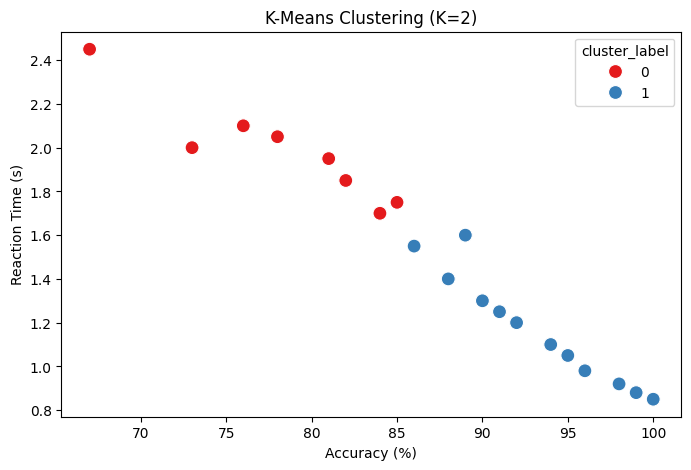

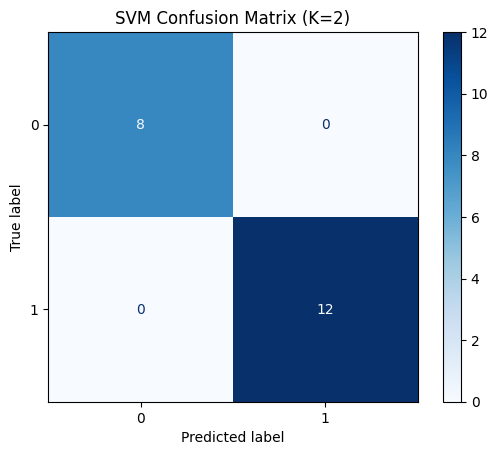

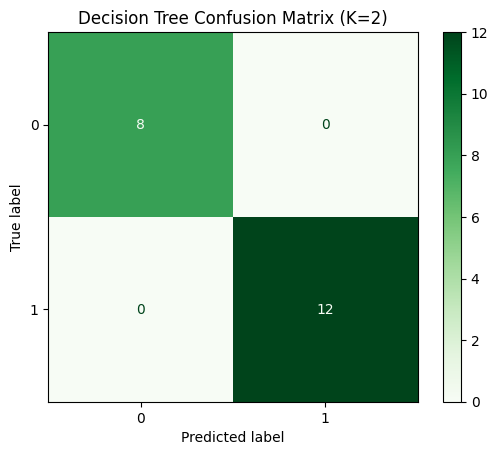

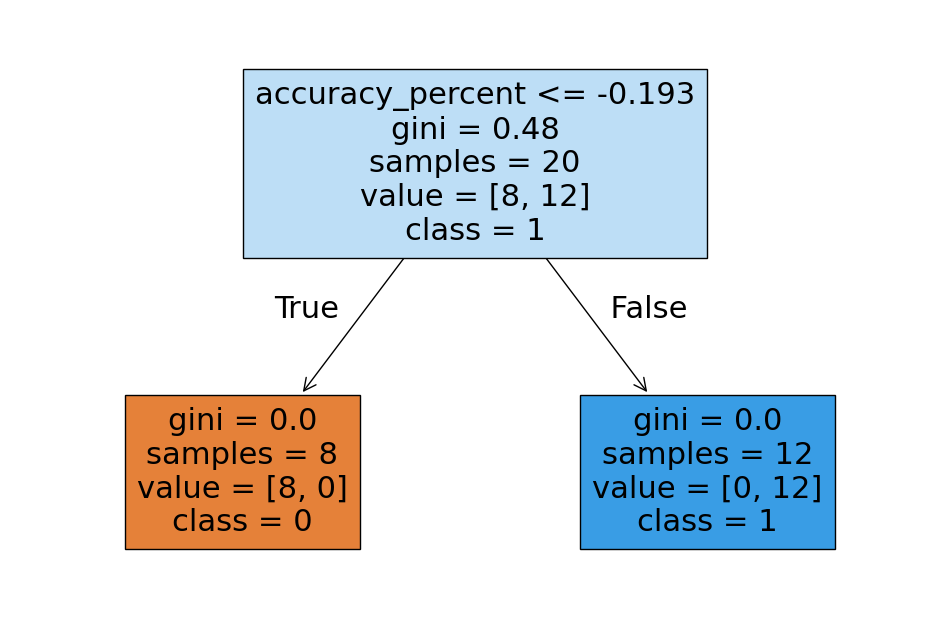

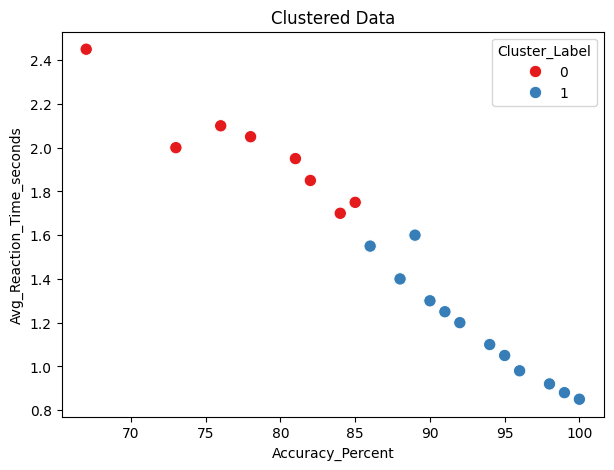

    trial  accuracy_percent  reaction_time_s  cluster_label
0       1                98             0.92              1
1       2                95             1.05              1
2       3                92             1.20              1
3       4                85             1.75              0
4       5                88             1.40              1
5       6                76             2.10              0
6       7                81             1.95              0
7       8                90             1.30              1
8       9                94             1.10              1
9      10               100             0.85              1
10     11                67             2.45              0
11     12                73             2.00              0
12     13                89             1.60              1
13     14                96             0.98              1
14     15                82             1.85              0
15     16                78             

In [ ]:

# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Load the data
data = {
    'trial': range(1,21),
    'accuracy_percent': [98,95,92,85,88,76,81,90,94,100,67,73,89,96,82,78,91,86,99,84],
    'reaction_time_s':[0.92,1.05,1.2,1.75,1.4,2.1,1.95,1.3,1.1,0.85,2.45,2,1.6,0.98,1.85,2.05,1.25,1.55,0.88,1.7]
}
df = pd.DataFrame(data)

# Step 2: Standardize features
X = df[['accuracy_percent','reaction_time_s']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering (K=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster_label'] = kmeans.fit_predict(X_scaled)

# Map clusters -> 1 = High performance, 0 = Low performance (based on centroids)
centers = kmeans.cluster_centers_
if centers[0][0] > centers[1][0]:   # higher accuracy = high performance
    mapping = {0:1, 1:0}  # 0 cluster becomes High=1, 1 cluster becomes Low=0
else:
    mapping = {0:0, 1:1}  # if cluster 1 has higher accuracy
df['cluster_label'] = df['cluster_label'].map(mapping)

# Step 4: Visualize Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='accuracy_percent', y='reaction_time_s',
                hue='cluster_label', data=df, palette='Set1', s=100)
plt.title('K-Means Clustering (K=2)')
plt.xlabel('Accuracy (%)')
plt.ylabel('Reaction Time (s)')
plt.show()

# Step 5: Split features and labels for classification
X_scaled = X_scaled  # Features
y = df['cluster_label']  # Labels from K-Means/manual mapping

# Step 6: Apply SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_scaled, y)
y_pred_svm = svm_model.predict(X_scaled)

# Step 7: Confusion Matrix for SVM
cm_svm = confusion_matrix(y, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)
disp_svm.plot(cmap='Blues')
plt.title("SVM Confusion Matrix (K=2)")
plt.show()

# Step 8: Apply Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_scaled, y)
y_pred_dt = dt_model.predict(X_scaled)

# Step 9: Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
disp_dt.plot(cmap='Greens')
plt.title("Decision Tree Confusion Matrix (K=2)")
plt.show()

# Step 10: Draw Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=['accuracy_percent','reaction_time_s'],
          class_names=[str(i) for i in sorted(df['cluster_label'].unique())], filled=True)
plt.show()

# =============================
# EXTRA DATA VISUALIZATION
# =============================

plt.figure(figsize=(7,5))
sns.scatterplot(x='accuracy_percent', y='reaction_time_s',
                hue='cluster_label', data=df, palette='Set1', s=80)
plt.title("Clustered Data")
plt.xlabel("Accuracy_Percent")
plt.ylabel("Avg_Reaction_Time_seconds")
plt.legend(title="Cluster_Label")
plt.show()

# Step 11: Show final labeled data
print(df)
